In [4]:
import os, time, h5py, platform, json, sys
if platform.system() == 'Linux':
    import matplotlib
    matplotlib.use('Agg')
sys.path.append("/Users/gkoolstra/Documents/Code")
from matplotlib import pyplot as plt
from shutil import copyfile
import numpy as np
from tqdm import tqdm
from scipy.optimize import minimize
from termcolor import cprint
from Common import common
from TrapAnalysis import trap_analysis, artificial_anneal as anneal
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Point charge inside a hollow sphere

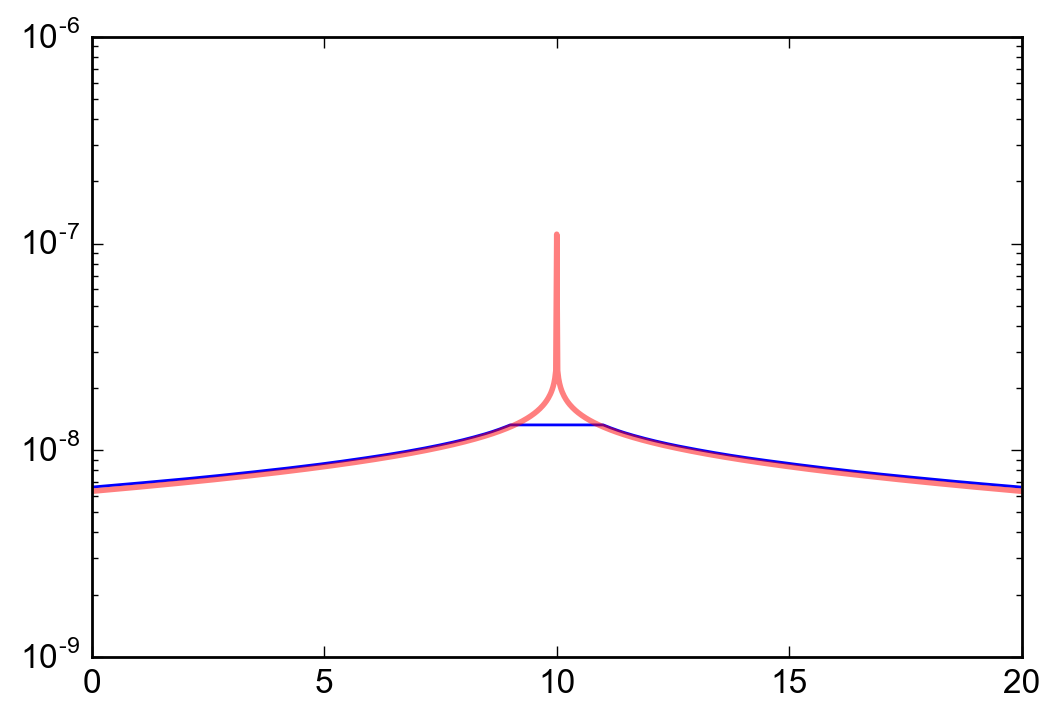

In [152]:
datafile = r'/Volumes/slab/Gerwin/Electron on helium/Electron optimization/SingleElectronInGroundedBoxPotential.csv'
data = common.load_csv(datafile, header_length=1)

x, phi = data[:,0]*1E-6, data[:, 1]*1E-9
plt.figure()
common.configure_axes(12)
plt.plot(x*1E6, phi, '-b')

def phi_fit(xx, charge_x = 1.8E-6):
    eps0 = 8.85E-12
    qe = 1.602E-19
    d = 1.0E-6
    return -qe/(2*np.pi*eps0)*(np.log(np.abs(xx-charge_x))-np.log(90E-6))
    
plt.plot(x*1E6, phi_fit(x, charge_x=10E-6), '-r', lw=2, alpha=.5)
#plt.ylim(1E-9, 1E0)
plt.yscale('log')

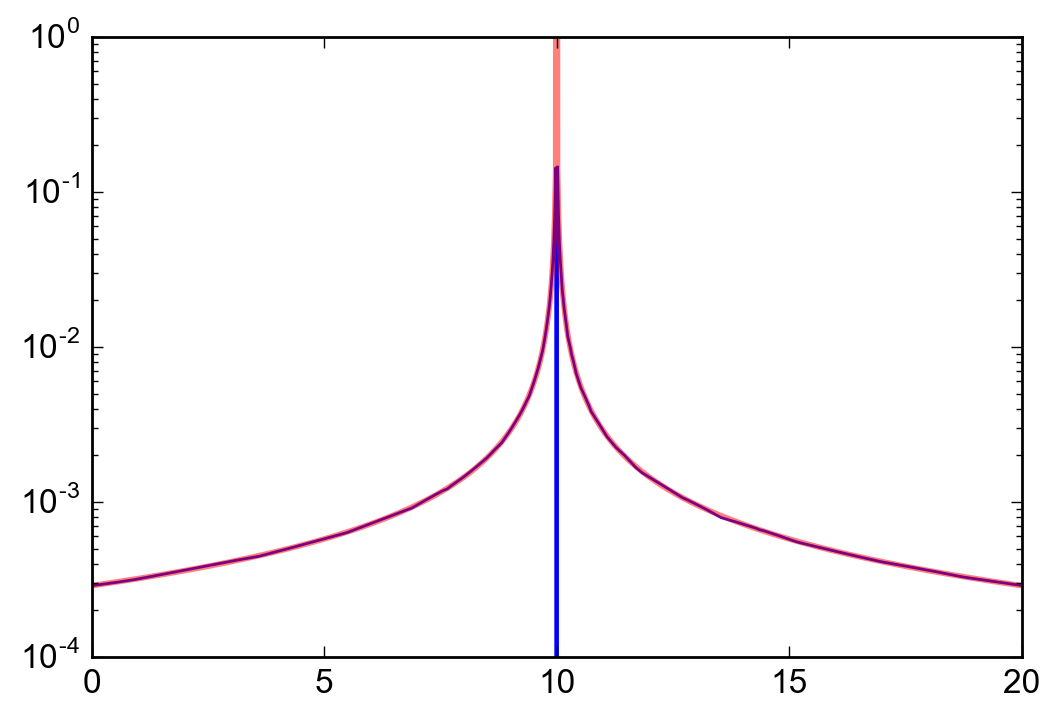

In [153]:
def magE_fit(xx, charge_x):
    eps0 = 8.85E-12
    e = 1.602E-19
    return e/(2*np.pi*eps0) * 1/np.abs(xx-charge_x)

datafile = r'/Volumes/slab/Gerwin/Electron on helium/Electron optimization/SingleElectronInGroundedBoxMagE.csv'
data = common.load_csv(datafile, header_length=1)
x, magE = data[:,0]*1E-6, data[:, 1]

plt.figure()
common.configure_axes(12)
plt.plot(x*1E6, magE, '-b')
plt.plot(x*1E6, magE_fit(x, charge_x=10E-6), '-r', lw=2, alpha=0.5)

plt.ylim(1E-4, 1E0)
plt.yscale('log')

# Point charge above a conducting plane

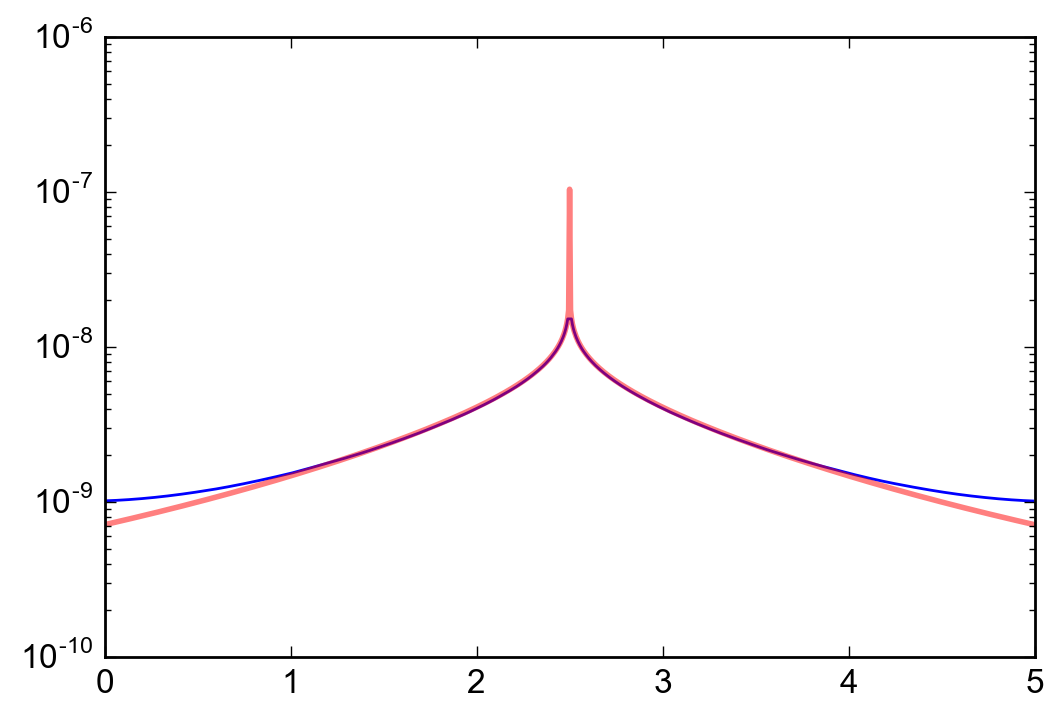

In [154]:
datafile = r'/Volumes/slab/Gerwin/Electron on helium/Electron optimization/SingleElectronAbovePlanePotential.csv'
data = common.load_csv(datafile, header_length=1)

x, phi = data[:,0]*1E-6, data[:, 1]*1E-9
plt.figure()
common.configure_axes(12)
plt.plot(x*1E6, phi, '-b')

def phi_fit(xx, charge_x = 1.8E-6):
    eps0 = 8.85E-12
    qe = 1.602E-19
    d = 1.0E-6
    return -qe/(2*np.pi*eps0)*(np.log(np.abs(xx-charge_x)/np.sqrt((xx-charge_x)**2 + (2*d)**2)))
    
plt.plot(x*1E6, phi_fit(x, charge_x=2.5E-6), '-r', lw=2, alpha=.5)
plt.yscale('log')

# Point charge above a dielectric substrate 

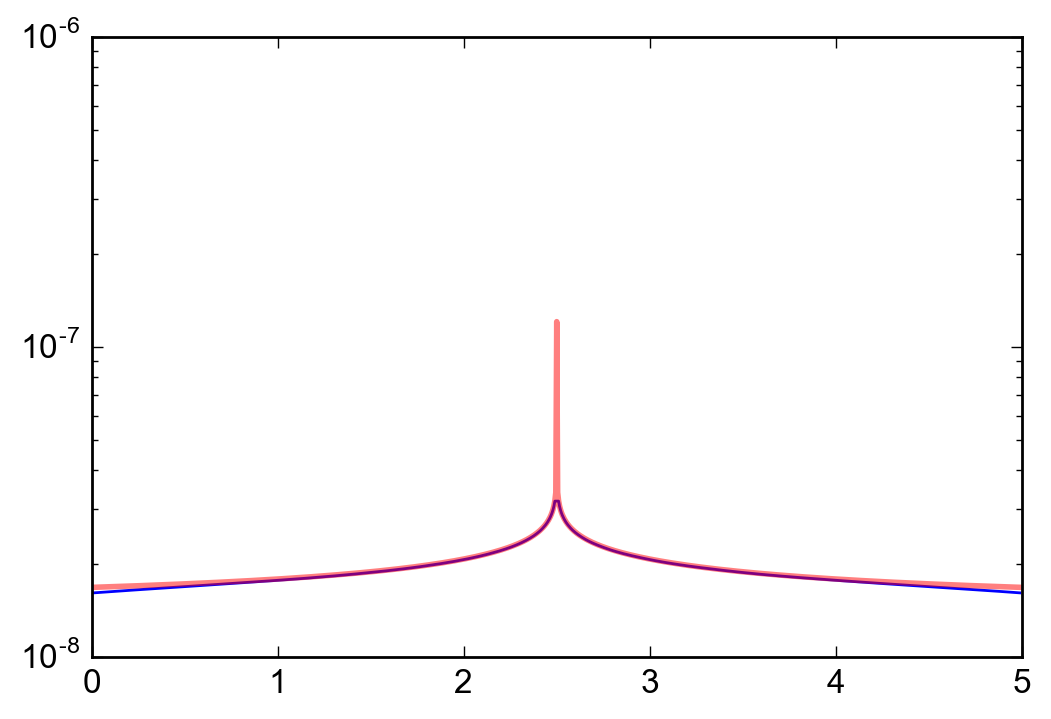

In [155]:
datafile = r'/Volumes/slab/Gerwin/Electron on helium/Electron optimization/SingleElectronAboveSubstratePotential.csv'
data = common.load_csv(datafile, header_length=1)

x, phi = data[:,0]*1E-6, data[:, 1]*1E-9
plt.figure()
common.configure_axes(12)
plt.plot(x*1E6, phi, '-b')

def phi_fit(xx, charge_x = 1.8E-6):
    eps0 = 8.85E-12
    epsS = 11.90
    qe = 1.602E-19
    d = 1.0E-6
    return -qe/(2*np.pi*eps0)*(np.log(np.abs(xx-charge_x)) - 2.65*1./4.*(epsS-1)/(epsS+1) * np.log(np.sqrt((xx-charge_x)**2 + (2*d)**2)))
    
plt.plot(x*1E6, phi_fit(x, charge_x=2.5E-6), '-r', lw=2, alpha=.5)
plt.yscale('log')

# Point charge above the resonator

/Users/gkoolstra/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log


Fit function: y = a0 + a1*x**2 + a2*x**4 + ...
===========  ===================  ==================
Parameter           Value                Std
===========  ===================  ==================
a0            801.7623692255149   2.5055228198508135
a1           -16.845915798683368  8.314641513802414
a2           -56.96967780421598   4.038917812465447
===========  ===================  ==================


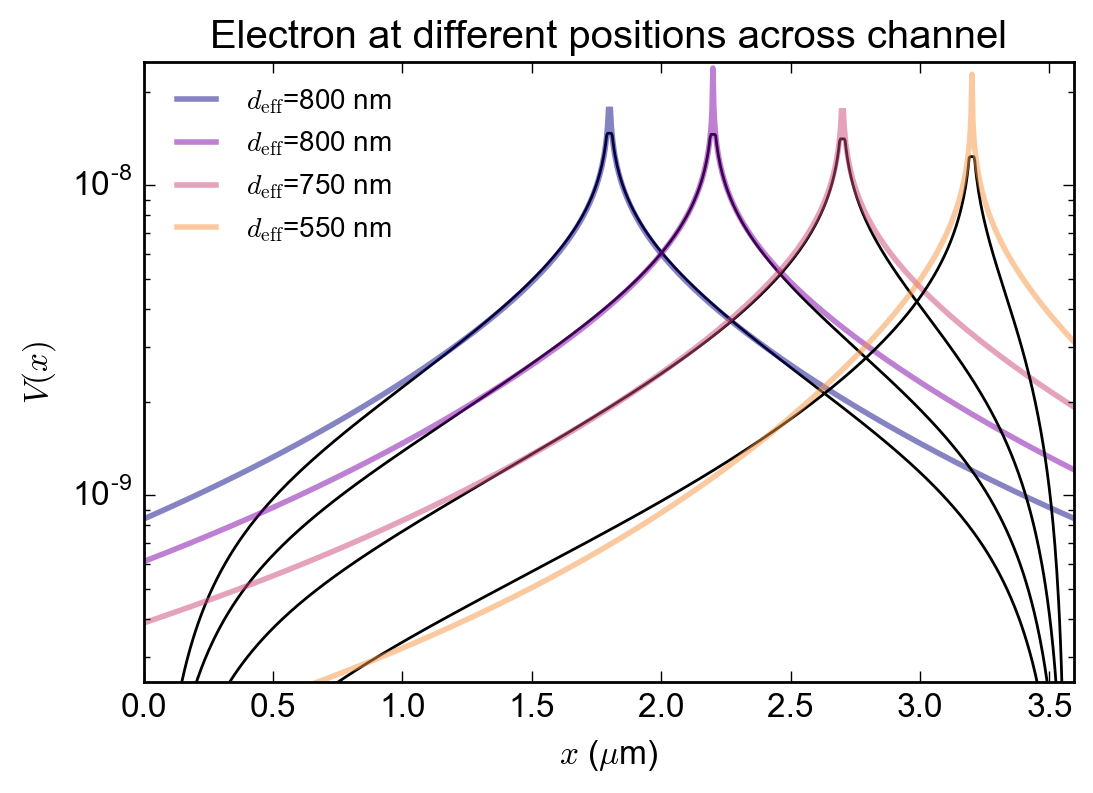

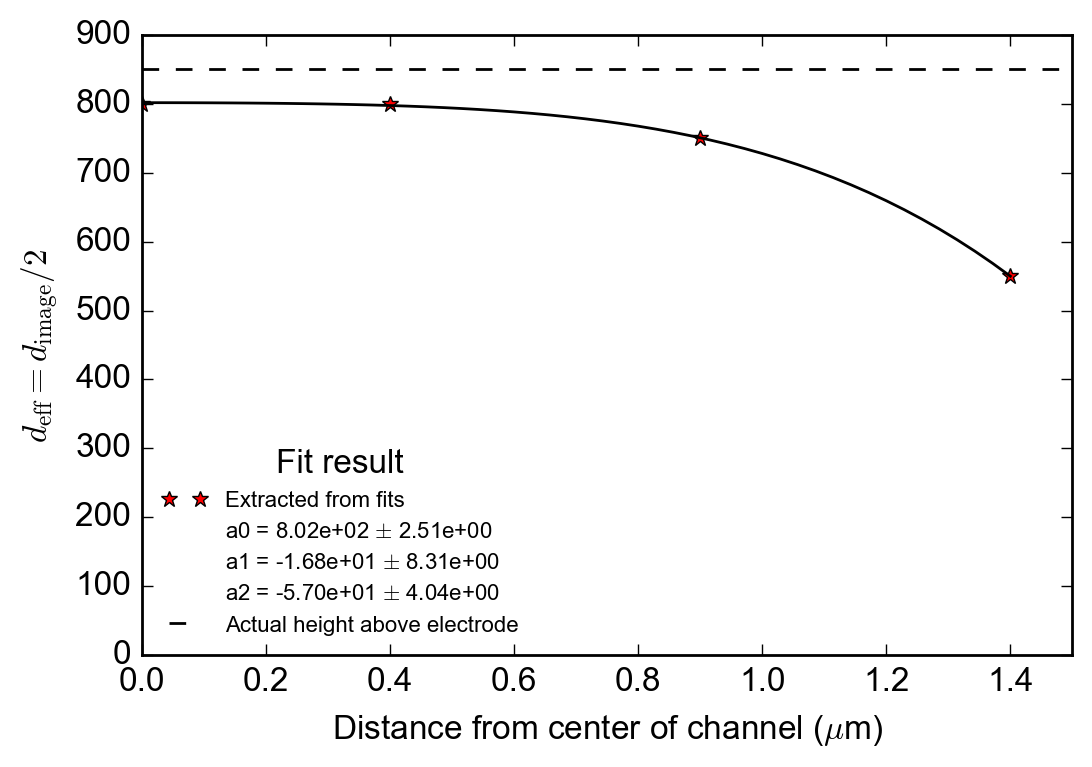

In [195]:
datafiles = [r'SingleElectronAboveResonatorPotential.csv', 
             r'SingleElectronAboveResonatorLessAsymPotential.csv', 
             r'SingleElectronAboveResonatorAsymPotential.csv', 
             r'SingleElectronAboveResonatorMoreAsymPotential.csv']

import matplotlib
def rgba(i, N):
    norm = matplotlib.colors.Normalize(vmin=0, vmax=N)
    cmap = plt.cm.plasma
    m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    return m.to_rgba(i)

def phi_fit(xx, charge_x = 1.8E-6):
    eps0 = 8.85E-12
    epsS = 11.90
    qe = 1.602E-19
    d = 1.0E-6
    return -qe/(2*np.pi*eps0)*(np.log(np.abs(xx-charge_x)) - 2.65*1./4.*(epsS-1)/(epsS+1) * np.log(np.sqrt((xx-charge_x)**2 + (2*d)**2)))
 
def phi_all_metal(xx, deff, charge_x=1.8E-6):
    eps0 = 8.85E-12
    qe = 1.602E-19
    return -qe/(2*np.pi*eps0)*(np.log(np.abs(xx-charge_x)/np.sqrt((xx-charge_x)**2 + (2*deff)**2)))

deffs = [800E-9, 800E-9, 750E-9, 550E-9]
charge_xs = [1.8E-6, 2.2E-6, 2.7E-6, 3.2E-6]

fig1=plt.figure()
common.configure_axes(12)
for i, datafile in enumerate(datafiles):
    data = common.load_csv(os.path.join(r'/Volumes/slab/Gerwin/Electron on helium/Electron optimization', datafile), header_length=1)
    x, phi = data[:,0]*1E-6, data[:, 1]*1E-9
    plt.plot(x*1E6, phi, '-k')
    plt.plot(x*1E6, phi_all_metal(x, deffs[i], charge_x=charge_xs[i]), '-', 
             color=rgba(i, len(deffs)), lw=2, alpha=.5, 
             label="$d_\mathrm{eff}$=%.0f nm"%(deffs[i]*1E9))

plt.legend(loc=0, prop={'size':10}, frameon=False)

plt.ylim(2.5E-10, 2.5E-8)
plt.yscale('log')
plt.xlim(np.min(x)*1E6, np.max(x)*1E6)
plt.ylabel("$V(x)$")
plt.xlabel("$x$ ($\mu$m)")
plt.title("Electron at different positions across channel")

fig2=plt.figure()
common.configure_axes(12)

xss = np.array(charge_xs)*1E6-1.8
xplot = np.linspace(np.min(xss), np.max(xss))

plt.plot(xss, np.array(deffs)*1E9, '*r', label="Extracted from fits")
plt.hlines(850, 0, 1.8, linestyles='--', color='k', label='Actual height above electrode')
plt.ylim(0, 900)
plt.xlim(0, 1.5)
plt.ylabel("$d_\mathrm{eff} = d_\mathrm{image}/2$")
plt.xlabel("Distance from center of channel ($\mu$m)")
plt.legend(loc=0, prop={'size':10}, frameon=False)

fr, ferr = kfit.fit_poly(xss, np.array(deffs)*1E9, mode='even', fitparams=[800, -1, -1])
plt.plot(xplot, kfit.polyfunc_even(xplot, *fr), '-k')

common.save_figure(fig1, save_path=r"/Users/gkoolstra/Documents/Code/iPythonNotebooks/Figures")
common.save_figure(fig2, save_path=r"/Users/gkoolstra/Documents/Code/iPythonNotebooks/Figures")

In [189]:
from Common import kfit